# Projet numérique : câble sous-marin
## Bruno LE CORFEC, Paul DHALLUIN

### Questions théoriques

#### Question 1
Il s'agit de la loi des grands nombres.

#### Question 2
En notant $X=x$ l'événement associé aux n observations et $Y$ le vecteur aléatoire des profondeurs des N-n+1 autres points, et en adoptant par ailleurs les notations du cours, on a :
$$
f_{Y | X=x}(y)=\frac{1}{(2 \pi)^{(N-n+1) / 2} \sqrt{\operatorname{det}\left(C S_{Y}\right)}}\left.\exp \left(-\frac{1}{2}(y-\psi(x))^{t} C S_{Y}^{-1}(y-\psi(x))\right)\right)
$$

Où l'espérance de $Y | X=x$ est :
$$
m_{Y | X=x}=\psi(x)=m_{Y}+C_{Y, X} C_{X}^{-1}\left(x-m_{X}\right)
$$
Et sa matrice de convariance est :
$$
C S_{Y}=C_{Y}-C_{Y, X} C_{X}^{-1} C_{X, Y}
$$

Il faut donc retenir que $Y | X=x$ suit une loi gaussienne d'espérance et de covariance connue.


#### Question 3
$Z$ suit une loi gaussienne d'espérance m et de matrice de covariance $R R^t$.

#### Question 4
Il suffit de simuler un vecteur gaussien $Y'$ centré réduit par la méthode de Box-Muller. On pourra ensuite obtenir  $Y | X=x$ connaissant son espérance et sa matrice de covariance. Pour cela il faudra trouver $R$, résultat de la factorisation de Cholesky de la matrice de covariance.

### Implémentation

#### Préambule

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import *

In [2]:
#Discrétisation
A = 0
B = 500
N = 101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

In [3]:
#Paramètres du modèle
mu = -5
a = 50
sigma2 = 12

In [4]:
#Données
observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

In [5]:
#Indices des composantes correspondant aux observations et aux composantes non observées
unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))

### Questions

##### Question 1

In [6]:
def covariance(distance, a = 50, sigma2 = 12):
    if type(distance) == int or type(distance) == float:
        return sigma2*np.exp(-distance/a)
    else:
        C = np.zeros(np.shape(distance))
        for i in range(len(distance)):
            for j in range(len(distance[0])):
                C[i][j] = sigma2*np.exp(-distance[i][j]/a)
        return C

##### Question 2

In [7]:
def distance(indexes):
    l = len(indexes)
    D = np.zeros((l,l))
    for i in range(l):
            for j in range(i+1):
                D[i][j] = D[j][i] = abs(indexes[i] - indexes[j])*Delta
    return D

In [8]:
#Calcul de la matrice de distance
distance(discretization_indexes)

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

##### Question 3

In [9]:
#Calcul de la matrice de covariance du vecteur Z
covariance(distance(discretization_indexes))

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

##### Question 4

In [10]:
#Matrice de covariance entre les observations
Cov_obs = covariance(distance(observation_indexes))
Cov_obs

array([[1.20000000e+01, 1.62402340e+00, 2.19787667e-01, 2.97450261e-02,
        4.02555153e-03, 5.44799157e-04],
       [1.62402340e+00, 1.20000000e+01, 1.62402340e+00, 2.19787667e-01,
        2.97450261e-02, 4.02555153e-03],
       [2.19787667e-01, 1.62402340e+00, 1.20000000e+01, 1.62402340e+00,
        2.19787667e-01, 2.97450261e-02],
       [2.97450261e-02, 2.19787667e-01, 1.62402340e+00, 1.20000000e+01,
        1.62402340e+00, 2.19787667e-01],
       [4.02555153e-03, 2.97450261e-02, 2.19787667e-01, 1.62402340e+00,
        1.20000000e+01, 1.62402340e+00],
       [5.44799157e-04, 4.02555153e-03, 2.97450261e-02, 2.19787667e-01,
        1.62402340e+00, 1.20000000e+01]])

In [11]:
#Matrice de covariance entre les observations et les inconnues

#Il s'agit d'abord de déterminer la matrice de distance qui est en fait un bloc de la matrice de distance de Z
D_obs_inc = np. zeros((len(observation_indexes), len(unknown_indexes)))
for i in range(len(observation_indexes)):
    for j in range(len(unknown_indexes)):
        D_obs_inc[i][j] = abs(observation_indexes[i] - unknown_indexes[j])*Delta

Cov_obs_inc = covariance(D_obs_inc)
Cov_obs_inc

array([[1.08580490e+01, 9.82476904e+00, 8.88981865e+00, 8.04384055e+00,
        7.27836792e+00, 6.58573963e+00, 5.95902365e+00, 5.39194757e+00,
        4.87883592e+00, 4.41455329e+00, 3.99445300e+00, 3.61433054e+00,
        3.27038152e+00, 2.95916357e+00, 2.67756192e+00, 2.42275822e+00,
        2.19220229e+00, 1.98358666e+00, 1.79482343e+00, 1.46947714e+00,
        1.32963790e+00, 1.20310612e+00, 1.08861544e+00, 9.85019983e-01,
        8.91282939e-01, 8.06466153e-01, 7.29720752e-01, 6.60278641e-01,
        5.97444820e-01, 5.40590429e-01, 4.89146448e-01, 4.42598009e-01,
        4.00479240e-01, 3.62368601e-01, 3.27884669e-01, 2.96682318e-01,
        2.68449262e-01, 2.42902937e-01, 1.98872105e-01, 1.79946922e-01,
        1.62822708e-01, 1.47328079e-01, 1.33307958e-01, 1.20622029e-01,
        1.09143325e-01, 9.87569646e-02, 8.93589969e-02, 8.08553640e-02,
        7.31609588e-02, 6.61987730e-02, 5.98991269e-02, 5.41989713e-02,
        4.90412573e-02, 4.43743646e-02, 4.01515855e-02, 3.633065

In [12]:
#Matrice de covariance entre les inconnues
Cov_inc = covariance(distance(unknown_indexes))
Cov_inc

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
       ...,
       [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

##### Question 5

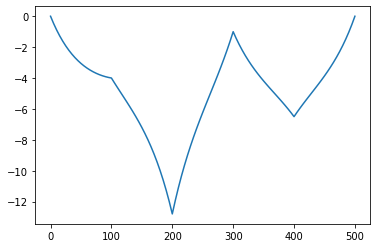

In [13]:
#Comme dans le cours on pose comme premier vecteur aléatoire Y les profondeurs correspondant aux points inconnnus
#Z correspond aux profondeurs connues

m_y = np.array([mu]*len(unknown_indexes))
m_z = np.array([mu]*len(observation_indexes))

C_yz = np.transpose(Cov_obs_inc)
C_z_inv = np.linalg.inv(Cov_obs)

m_y_cond = m_y + np.matmul(np.matmul(C_yz, C_z_inv), depth - m_z) 

#on regroupe toutes les listes

liste_profondeur = []
for profondeur_obs, i in zip(depth[:-1], observation_indexes[:-1]):
    liste_profondeur += [profondeur_obs]
    for profondeur_inc, j in zip(m_y_cond, unknown_indexes):
        if i < j < i + 20:
            liste_profondeur += [profondeur_inc]
liste_profondeur += [depth[-1]]

plt.plot(discretization, liste_profondeur)
plt.show()


##### Question 6

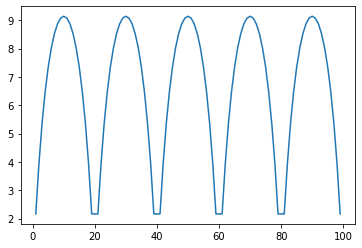

In [14]:
#Calcul de la matrice de covariance toujours d'après le cours

C_y = Cov_inc
C_zy = Cov_obs_inc
C_yz = np.transpose(Cov_obs_inc)
C_z_inv = np.linalg.inv(Cov_obs)

C_y_cond = C_y - np.matmul(np.matmul(C_yz, C_z_inv), C_zy)

Diago = [C_y_cond[i][i] for i in range(len(C_y_cond))]

plt.plot(unknown_indexes , Diago)
plt.show()

Il y a beaucoup d'incertitude loin des points d'observation et beaucoup de certitudes près des points d'observation. C'est bien ce que l'on voulait à la définition de la fonction de C.

##### Question 7

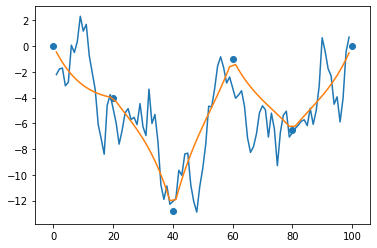

In [15]:
R = np.linalg.cholesky(C_y_cond)

def simulation() :
    Y = np.ones(len(unknown_indexes))
    for i in range(len(unknown_indexes)) :
        U = np.random.uniform()
        V = np.random.uniform()
        Y[i] = np.sqrt(-2 * np.log(U)) * np.cos(2 * np.pi * V) #vecteur gaussien centré, réduit construit selon la méthode de Box-Muller
    Z = m_y_cond + R.dot(Y)        
    return Z

Z = simulation()
plt.plot(unknown_indexes, Z)
plt.scatter(observation_indexes, depth)
plt.plot(unknown_indexes, m_y_cond)
plt.show()

Les profils sont très peu lisses, notamment loin des points d'observation.

##### Question 8

In [16]:
def longueur_cable(profondeurs, pas):
    somme = 0
    ref = profondeurs[0]
    for profondeur in profondeurs[1:]:
        somme += np.sqrt(pas**2 + (profondeur - ref)**2)
        ref = profondeur
    return somme

##### Question 9

In [17]:
def L_sim(nb_simul) :
    L = []
    for k in range(nb_simul) :
        Z = simulation()
        liste_profondeur_Z = []
        for profondeur_obs, i in zip(depth[:-1], observation_indexes[:-1]):
            liste_profondeur_Z += [profondeur_obs]
            for profondeur_inc, j in zip(Z, unknown_indexes):
                if i < j < i + 20:
                    liste_profondeur_Z += [profondeur_inc]
        liste_profondeur_Z += [depth[-1]]

        L.append(longueur_cable(liste_profondeur_Z, Delta))
    return L


L100 = L_sim(100)

L_esp_cond = longueur_cable(liste_profondeur, Delta)

print(f"L'espérance conditionnelle estimée de la longueur est {np.round(np.average(L100), 3)} m.")
print(f"La longueur de l'espérance conditionnelle est {np.round_(L_esp_cond, 3)}m.")


L'espérance conditionnelle estimée de la longueur est 522.562 m.
La longueur de l'espérance conditionnelle est 501.647m.


La longueur de l'espérance conditionnelle est plus courte parce que la courbe est lisse. D'où l'importance de simuler la loi et pas seulement l'espérance pour ce problème.

##### Question 10

522.235


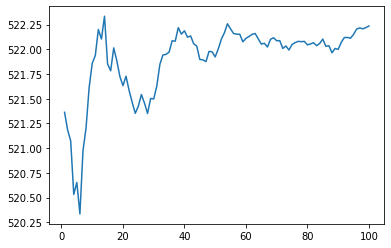

In [18]:
L100 = L_sim(100)
def Mn(L, ax = None) :
    nb_simul = len(L)
    x = [k for k in range(1, nb_simul + 1)]
    y = [np.average(L[:i]) for i in range(1, nb_simul + 1)]
    plt.plot(x, y)
    print(np.round(y[-1], 3))
Mn(L100)

Mn se stabilise autour d'une valeur limite qui correspond à l'espérance conditionnelle estimée de la longueur du cable.

##### Question 11

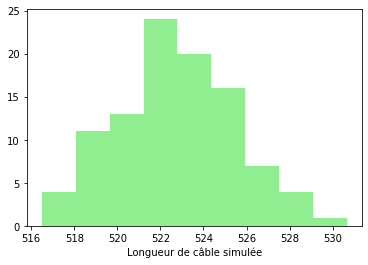

In [19]:
L100 = L_sim(100)
def histogramme(L) :
    plt.hist(L, bins = "auto",facecolor = "lightgreen")
    plt.xlabel('Longueur de câble simulée')
    plt.show()


histogramme(L100)

##### Question 12

In [20]:
def interv_95_1(liste): #en sortant 2.5% des échantillons en haut et en bas
    liste.sort()
    lim = floor(len(liste)*0.025)
    lim_basse = liste[lim-1]
    lim_haute = liste[-lim]
    return f"[{lim_basse}, {lim_haute}]"

def interv_95_2(liste, pas = 0.01): #en prenant 95% des valeurs centrées sur la moyenne
    liste.sort()
    moy = np.mean(liste)
    lim_longueur = ceil(0.95*len(liste))
    while len(liste) > lim_longueur:
        if moy - liste[0] > liste[-1] - moy:
            liste.pop(0)
        else:
            liste.pop(-1)
    if moy - liste[0] > liste[-1] - moy:
        lim_basse = liste[0]
        lim_haute = 2*moy - liste[0]
        return f"[{lim_basse}, {lim_haute}]"
    else:
        lim_basse = 2*moy - liste[-1]
        lim_haute = liste[-1]
        return f"[{lim_basse}, {lim_haute}]"

L100 = L_sim(100)
print(interv_95_1(L100))
print(interv_95_2(L100))

[516.0060978960291, 527.7673646402081]
[517.1845485919893, 527.8514878088905]


Du fait du petit nombre de simulations, la méthode 1 enlève un élément de moins que la méthode 2. L'intervalle de la méthode 2 finit donc par être inclu dans l'intervalle de la méthode 1. Cela s'arrange lorque l'on va augmenter le nombre de simulation.

##### Question 13

In [21]:
L100 = L_sim(100)
n = 0
for i in L100:
    if i>=525:
        n+=1
print(f"la probabilité que le longueur dépasse 525 m est {n/100}")
      

la probabilité que le longueur dépasse 525 m est 0.26


##### Question 14

###### Pour 1000

522.435
la probabilité que le longueur dépasse 525 m est 0.203


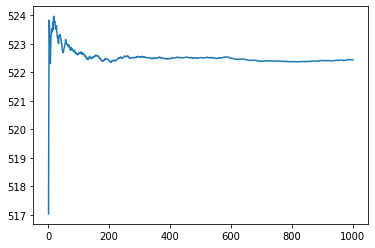

In [22]:
L1000 = L_sim(1000)
Mn(L1000)

#
for i in L1000:
    if i>=525:
        n+=1
print(f"la probabilité que le longueur dépasse 525 m est {n/1000}")

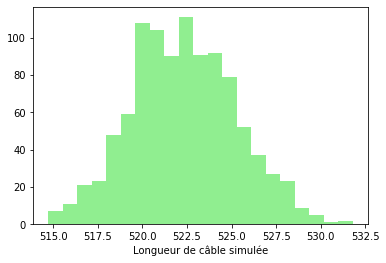

[516.6539429346166, 528.2095129076463]
[516.6264158987433, 528.0035477021036]


In [126]:
histogramme(L1000)
print(interv_95_1(L1000))
print(interv_95_2(L1000))

###### Pour 10000

522.416
la probabilité que le longueur dépasse 525 m est 0.1996


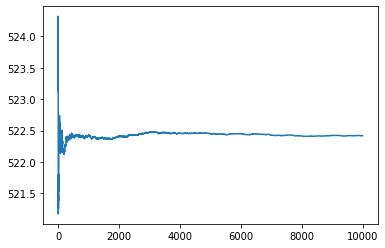

In [127]:
L10000 = L_sim(10000)
Mn(L10000)

#
for i in L10000:
    if i>=525:
        n+=1
print(f"la probabilité que le longueur dépasse 525 m est {n/10000}")

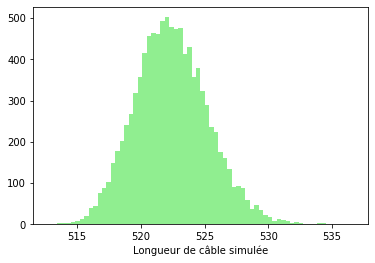

[517.1267472164989, 528.3315380202587]
[516.8191137972238, 528.0134779903909]


In [128]:
histogramme(L10000)
print(interv_95_1(L10000))
print(interv_95_2(L10000))

###### Pour 100000

In [ ]:
L100000 = L_sim(100000)
Mn(L100000)

#
for i in L100000:
    if i>=525:
        n+=1
print(f"la probabilité que le longueur dépasse 525 m est {n/100000}")

In [ ]:
histogramme(L100000)
print(interv_95_1(L100000))
print(interv_95_2(L100000))

Plus le nombre de simulations est grand, plus la moyenne estimée de la longueur se stabilise. L'histogramme prend une forme régulière. Par ailleurs, pour ces nombres de simulations, les deux méthodes pour l'intervalle de confiance donnent des intervalles de tailles similaires mais décalés. 